# Einfache Regressionsverfahren mit Lösungen
In diesem Jupyter Notebook sollen die Regressionsverfahren aus der Vorlesung angewandt und ausprobiert werden. Zu diesem Zweck stehen einige (synthetische) [Datensätze](https://github.com/MarkEich96/Maschinelles-Lernen-SoSe-2024/tree/main) zur Verfügung. 

## Vorbereitungen
Zum einen, sollen große Datenmengen besonders effizient verarbeitet werden, wozu das Paket `numpy` benötigt wird. Andererseits ist es auch praktisch die Ergebnisse grafisch aufzutragen. Hierzu wird das Paket `matplotlib` herangezogen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Eindimensionale lineare Regression
Im Datensatz `linear_regression_data01.dat` sind die Ergebnisse eines Experiments zum Photoelektrischen Effekt aufgetragen. Bei diesem wird eine Kupferplatte mit Licht unterschiedlicher Frequenzen bestrahlt. Aus der Platte treten Elektronen aus, deren (kinetische) Energie gemessen wird. Die Frequenzen sind in $\mathrm{PHz}=10^{15}\,\mathrm{Hz}$ angegeben, während die Energien in $\mathrm{eV}=1{,}6\cdot 10^{-19}\,\mathrm{J}$ angegeben sind.

__Aufgabe__: Vervollständige das untenstehende Codegerüst, um Dich davon zu überzeugen, dass zwischen den Energien und den Frequenzen ein linearer Zusammenhang besteht. 

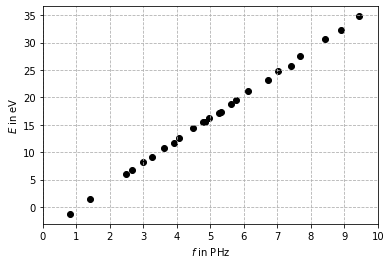

In [2]:
# Lade den Datensatz
f, E = np.loadtxt('linear_regression_data01.dat', unpack = True)

# Trage die Daten in einem Streudiagramm auf
plt.scatter(f, E, color = 'k')

# Achsenbeschriftung 
plt.xlabel(r'$f$ in $\mathrm{PHz}$')
plt.ylabel(r'$E$ in $\mathrm{eV}$')

# Koordinatengitter
plt.xticks(np.arange(11))
plt.grid(True, linestyle = '--')

plt.show()

### Ideale Parameter

In der Vorlesung wurde besprochen, dass für eine Ausgleichsgerade $y = w_1x+w_0$ die idealen Gewichte durch
$$
w_1 = \frac{s(x, y)}{s(x, x)}\quad\quad w_0 = \langle y\rangle-w_1\langle x\rangle
$$
gegeben sind. Hierbei ist 
$ \langle x\rangle =\frac{1}{N}\sum_{i=1}^{N}x_i$
das _arithemtrische Mittel_ und $s(x, y)=\langle x\cdot y\rangle-\langle x\rangle\langle y\rangle$ die _Kovarianz_.

__Aufgabe__: Implimentiere zunächst mit Hilfe der Funktion `np.sum()` das arithemtrische Mittel `mittel()` und die Kovarianz `kovar()` als eine Python-Funktion. Verwende diese dann, um die idealen Gewichte zu bestimme. Fertige dann eine Skizze mit den Daten und der Ausgleichsgeraden an.

#### Aritmetrisches Mittel und Kovarianz als Funktion

In [3]:
# Funktion die das arithmetrische Mittel eines Arrays zurück gibt
def mittel(x):
    return np.sum(x)/len(x)

# Funktion die die Kovarianz zweier Arrays gleicher Länge zurück gibt.
def kovar(x, y):
    return (mittel(x*y)-mittel(x)*mittel(y))

__Bemerkung__: Es gibt auch vorgefertigte Python-Funktionen, die das arithmetrische Mittel `np.mean()` und die Kovarianz `np.cov()` berechnen. Die Funktion `np.cov(x, y)` erstellt dabei die sogenannte Kovarianz-Matrix, welche die Form
$$\Sigma = \begin{pmatrix}
s(x, x) & s(x, y)\\
s(y, x) & s(y, y)
\end{pmatrix}
$$ 
hat. Aus ihr muss also noch die richtige Komponente entnommen werden.

#### Bestimmen der idealen Gewichte

In [4]:
# Bestimmen der Steigung gemäß obiger Formel
w1 = kovar(f, E)/kovar(f, f)

# Bestimmen des Achsenabschnitts gemäß obiger Formel
w0 = mittel(E)-w1*mittel(f)

# Ausgabe der Werte
print(f'Die Steigung der Ausgleichsgerade ist durch {w1:.2f} eV/PHz gegeben.')
print(f'Der E-Achsenabschnitt der Ausgleichsgerade ist durch {w0:.2f} eV gegeben.')

Die Steigung der Ausgleichsgerade ist durch 4.13 eV/PHz gegeben.
Der E-Achsenabschnitt der Ausgleichsgerade ist durch -4.37 eV gegeben.


__Bemerkung__: Die Steigung lässt sich in Joule Sekunden umrechnen und ist dann durch

In [5]:
w1*1.602*10**(-19)*10**(-15)

6.623192726571745e-34

gegeben. Bei dieser Größe handelt es sich um das Planck'sche Wirkungsquantum, welches die Energie eines Lichtquants mit dessen Frequenz in Verbindung setzt.

#### Skizzieren der Daten und Ausgleichsgeraden

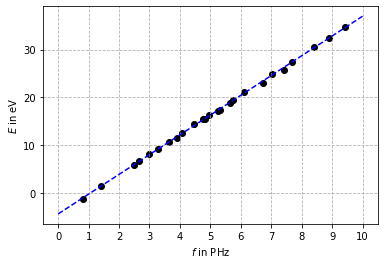

In [6]:
# Trage die Daten in einem Streudiagramm auf
plt.scatter(f, E, color = 'k')

# Erstellen eines Arrays an Frequenzen für die Auftragung
F = np.linspace(0, 10, 100)

# Auftragen der Ausgleichsgerade
plt.plot(F, w1*F+w0, 'b--')

# Achsenbeschriftung 
plt.xlabel(r'$f$ in $\mathrm{PHz}$')
plt.ylabel(r'$E$ in $\mathrm{eV}$')

# Koordinatengitter
plt.xticks(np.arange(11))
plt.grid(True, linestyle = '--')

plt.show()

### Gradientenabstieg

In der Vorlesung wurde auch besprochen, dass sich die idealen Gewichte durch ein Gradientenabstiegsverfahren zumindest näherungsweise bestimmen lassen sollten. Dazu wurde der Gradient des empirischen Risikos durch
$$
    \nabla_{\vec{w}} \hat{R}(\vec{w})=\frac{2}{N}\underline{X}'(\underline{X}'\vec{w}-\vec{y})
$$
ermittelt. Darin sind $\vec{w}\in\mathbb{R}^2$ der Gewichtsvektor, $\vec{y}\in\mathbb{R}^N$ der Ergebnisvektor und 
$$
\underline{X}'=\begin{pmatrix}
1 & x_1\\
1 & x_2\\
\vdots & \vdots\\
1 & x_N
\end{pmatrix}\in\mathbb{R}^{N\times 2}
$$
die erweiteret Datenmatrix. Bei einer Iteration sind die neuen Gewichte durch
$$
\vec{w}^{(n+1)}=\vec{w}^{(n)}-\eta  \nabla_{\vec{w}} \hat{R}(\vec{w}^{(n)})
$$
bestimmt, wobei $\eta$ die Lernrate ist.

__Aufgabe__: Ergänze das nachstehende Code-Gerüst, um das Gradientenabstiegsverfahren zu implementieren und bestimme auf diese Weise die Ausgleichsgerade. Probiere verschiedene Werte für die Lernrate und die Anzahl der Lernepochen aus. Gibt es Wahlen dieser Hyperparameter, die die gleichen Ergebnisse wie die idealen Gewichte ergeben? 
_Tipp_: Unterschlage den Faktor $\frac{2}{N}$ im Gradienten.

#### Implementieren des Gradientanabstiegsverfahrens

In [7]:
# Festlegen der Lernrate 
eta = 10**(-3)

# Festlegen der Anzahl der benötigten Schritte
epochen = 10000

# Festlegen initialer Gewichte
W = np.zeros(2)

# Formatieren der Frequenzen in eine erweiteret Datenmatrix
N = len(f)    # Anzahl der Datenpunkte
X = np.zeros(shape=(N, 2))

for n in range(N):
    X[n]=np.array([1, f[n]])
    
# Ausführen des Gradientenabstiegsverfahren
for n in range(epochen):
    W = W-eta*X.T@(X@W-E)
    
# Ausgabe der Werte
print(f'Die Steigung der Ausgleichsgerade ist durch {W[1]:.2f} eV/PHz gegeben.')
print(f'Der E-Achsenabschnitt der Ausgleichsgerade ist durch {W[0]:.2f} eV gegeben.')

Die Steigung der Ausgleichsgerade ist durch 4.13 eV/PHz gegeben.
Der E-Achsenabschnitt der Ausgleichsgerade ist durch -4.37 eV gegeben.


#### Auftragen der Ausgleichsgeraden

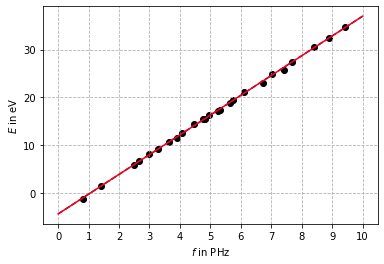

In [8]:
# Trage die Daten in einem Streudiagramm auf
plt.scatter(f, E, color = 'k')

# Erstellen eines Arrays an Frequenzen für die Auftragung
F = np.linspace(0, 10, 100)

# Auftragen der idealen Ausgleichsgerade
plt.plot(F, w1*F+w0, 'b--')

# Auftragen der Ausgleichsgeraden aus dem Gradientenabstieg
plt.plot(F, W[1]*F+W[0], 'r-')

# Achsenbeschriftung 
plt.xlabel(r'$f$ in $\mathrm{PHz}$')
plt.ylabel(r'$E$ in $\mathrm{eV}$')

# Koordinatengitter
plt.xticks(np.arange(11))
plt.grid(True, linestyle = '--')

plt.show()

## Feature engineering
In der Vorlesung wurde besprochen, dass manche Daten vorher durch eine Funktion $\phi$ in einen passenden Raum überführt werden müssen, um eine lineare Regression durchführen zu können. Betrachte dazu den Datensatz `linear_regression_data02.dat`. Darin sind die Abstände der Planeten von der Sonne in Vielfachen des Erdabstandes ($\sim 149{,}6\cdot 10^9\,\mathrm{m}$) und ihre Umlaufzeiten in Vielfachen von Erdjahren ($\sim 3{,}156\cdot 10^{7}\,\mathrm{s}$) angegeben. 

__Aufgabe__: Trage die Umlaufszeiten $T$ gegen die Abstände $a$ auf und stelle eine Vermutung über den funktionalen Zusammenhang an.

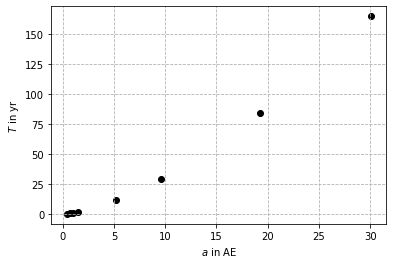

In [9]:
# Lade den Datensatz
a, T = np.loadtxt('linear_regression_data02.dat', unpack = True)

# Trage die Daten in einem Streudiagramm auf
plt.scatter(a, T, color = 'k')

# Achsenbeschriftung 
plt.xlabel(r'$a$ in $\mathrm{AE}$')
plt.ylabel(r'$T$ in $\mathrm{yr}$')

# Koordinatengitter
plt.grid(True, linestyle = '--')

plt.show()

Ein linearer Zusammenhang scheint nicht vorzuliegen. In der Physik stehen verschiedene Größen häufig über ein Potentzgesetz in Verbindung, so dass der Ansatz $y = Cx^a$ gerechtfertigt scheint. Damit bieten sich die Feature maps $\phi_x(x)=\mathrm{ln}(x)$ und $\phi_y(y)=\mathrm{ln}(y)$ an.

### Feature map auswählen
In der Vorlesung haben wir einige mögliche Feature maps besprochen. Diese sind Abbildungen $\phi_x:X\to \mathbb{R}^n$, $\phi_y:Y\to \mathbb{R}^m$, die es erlauben auch nicht lineare Zusammenhänge durch eine lineare Regression behandeln zu können.

__Aufageb__: Wähle eine solche aus und trage damit die Daten nocheinmal auf. Verwende das Gradientenabstiegsverfahren, um eine lineare Regression durchzuführen und bestimme so den funktionalen Zusammenhang zwischen der Umlaufzeit und dem Abstand zur Sonne. Welche Umlaufszeit würdest Du nach diesem Modell für einen Planet in Abstand $a = 2{,}766\,\mathrm{AE}$ erwarten?

#### Feature map und Auftragung der Daten
Wir wählen $\phi_x(x)=\phi_y(x)=\mathrm{ln}(x)$.

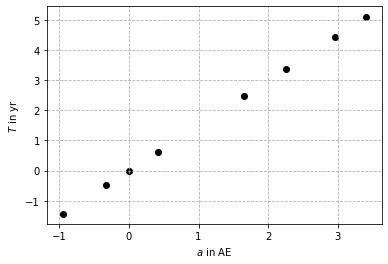

In [10]:
# Lade den Datensatz
a, T = np.log(a), np.log(T)

# Trage die Daten in einem Streudiagramm auf
plt.scatter(a, T, color = 'k')

# Achsenbeschriftung 
plt.xlabel(r'$a$ in $\mathrm{AE}$')
plt.ylabel(r'$T$ in $\mathrm{yr}$')

# Koordinatengitter
plt.grid(True, linestyle = '--')

plt.show()

#### Bestimmen der Ausgleichsgeraden

In [11]:
# Aufbauen der erweiterten Datenmatrix
N = len(a)
X = np.zeros((N, 2))
for n in range(N):
    X[n]=np.array([1, a[n]])

# Durchführen der linearen Regression
epochen = 10000
learning_rate = 10**(-4)

w = np.zeros(2)

for n in range(epochen):
    w = w-learning_rate*X.T@(X@w-T)


print(w)

[0.00479844 1.49749569]


#### Auftragen der Ausgleichsgeraden

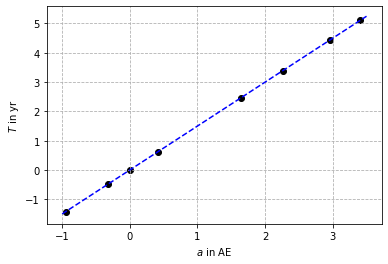

In [12]:
# Trage die Daten in einem Streudiagramm auf
plt.scatter(a, T, color = 'k')

# Auftragen der Ausgleichsgeraden
A = np.linspace(-1, 3.5, 100)
plt.plot(A, w[1]*A+w[0], 'b--')

# Achsenbeschriftung 
plt.xlabel(r'$a$ in $\mathrm{AE}$')
plt.ylabel(r'$T$ in $\mathrm{yr}$')

# Koordinatengitter
plt.grid(True, linestyle = '--')

plt.show()

Damit lässt sich der Funktionale Zusammenhang $T = C\cdot a^d$ mit

In [13]:
print(f'C = {np.exp(w[0]):.2f} und d = {w[1]:.2f}')

C = 1.00 und d = 1.50


finden. Für einen Planeten im Abstand $2{,}766\,\mathrm{AE}$ (wie der Zwergplanet Ceres im Asteoridengürtel zwischen Mars und Jupiter) kann nach diesem Modell die Umlaufszeit

In [14]:
print(f'T = {np.exp(w[0])*2.766**w[1]:.2f} Jahren')

T = 4.61 Jahren


gefunden werden. (Tatsächlich hat Ceres eine Umlaufdauer von etwa $4{,}56$ Jahren)

__Bemerkung__: Durch Betrachtung der Newton'schen Gravitationstheorie wird klar, dass es sich bei $C$ um die Größe $\sqrt{\frac{4\pi^2}{GM}}$ mit der Sonnenmasse $M$ und der Gravitationskonstante $G$ handelt.

## Polynomielle Modelle durch lineare Regression

In der Vorlesung wurde auch darüber gesprochen, wie sich ein polynomielles Modell mit einer linearen Regression bestimmen lassen kann. Im Datensatz `linear_regression_data03.dat` ist der Ort eines Autos in Metern zu festen Zeitpunkten in Sekunden angegeben. 

__Aufgabe__: Trage die Daten auf und entscheide, welchen Grad das polynomielle Modell haben sollte.

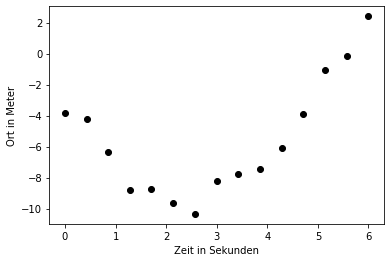

In [15]:
# Laden der Daten
t, x = np.loadtxt('linear_regression_data03.dat', unpack = True)

# Auftragen der Daten
plt.scatter(t, x, color = 'k')

# Beschriften der Achsen
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Ort in Meter')

plt.show()

Ein linearer Zusammenhang besteht sicher nicht. Ein quadratischer Zusammenhang ist möglich, falls es sich beim ersten Datenpunkt um einen Ausreißer handelt. Ein Polynom dritten Grades könnte die Daten sehr gut annähren.

### Optimales Modell finden
__Aufgabe__: Führe nun ein Gradientenabstiegverfahren sowohl für ein quadratisches ($g=2$), wie auch ein kubisches ($g = 3$) Modell durch. Plotte beide Modelle in die gleiche Skizze und ermittle deren jeweiligen Trainingsfehler $$\hat{R}(D_{\mathrm{Tr}})=\frac{1}{N}\sum_{i=1}^{N}(h_{\vec{w}}(x_i)-y_i)^2$$

_Tipp_: In diesem Fall lohnt es sich, bereits gute Startparameter zu schätzen.

#### Quadratisches Modell

In [16]:
# Anzahl der Datenpunkte 
N = len(t)

# Aufstellen der erweiterten Datenmatrix
X_quadr = np.zeros((N, 3))
for n in range(N):
    X_quadr[n]=np.array([1, t[n], t[n]**2])
    
# Ermitteln der idealen Gewichte
w_quadr = np.array([-2, -9, 2])

learning_rate = 10**(-4)
epochen = 100000

for n in range(epochen):
    w_quadr = w_quadr-learning_rate*X_quadr.T@(X_quadr@w_quadr-x)

# Bestimmen des Trainingsfehlers
Diff_h_y = X_quadr@w_quadr-x
R_quadr = 1/N*Diff_h_y.T@Diff_h_y

print(f'Der Trainingsfehler des quadratischen Modells liegt bei {R_quadr:.2f}')

Der Trainingsfehler des quadratischen Modells liegt bei 0.44


#### Kubisches Modell

In [17]:
# Aufstellen der erweiterten Datenmatrix
X_kub = np.zeros((N, 4))
for n in range(N):
    X_kub[n]=np.array([1, t[n], t[n]**2, t[n]**3])
    
# Ermitteln der idealen Gewichte
w_kub = np.array([-2, .3, -2.5, .4])

learning_rate = 10**(-5)
epochen = 100000

for n in range(epochen):
    w_kub = w_kub-learning_rate*X_kub.T@(X_kub@w_kub-x)

# Bestimmen des Trainingsfehlers
Diff_h_y = X_kub@w_kub-x
R_kub = 1/N*Diff_h_y.T@Diff_h_y

print(f'Der Trainingsfehler des kubischen Modells liegt bei {R_kub:.2f}')

Der Trainingsfehler des kubischen Modells liegt bei 0.78


#### Gemeinsames Auftragen der Daten

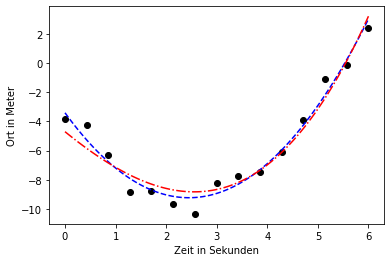

In [18]:
# Auftragen der Daten
plt.scatter(t, x, color = 'k')

# Auftragen des quadratischen Modells
T = np.linspace(np.min(t), np.max(t), 100)
plt.plot(T, w_quadr[2]*T**2+w_quadr[1]*T+w_quadr[0], 'b--')

# Auftragen des kubischen Modells
plt.plot(T, w_kub[3]*T**3+w_kub[2]*T**2+w_kub[1]*T+w_kub[0], 'r-.')

# Beschriften der Achsen
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Ort in Meter')

plt.show()

### Testen der Modell
Im Datensatz `linear_regression_data04.dat` liegt eine genauere Messung der Situation vor. 

__Aufgabe__: Verwende diese, um den Testfehler und den Verallgemeinerungsfehler (Generalization Gap) der beiden Modelle zu bewerten. Welches der Modelle beschreibt die Situation besser? Was sind die Bedeutungen der einzelnen Parameter?

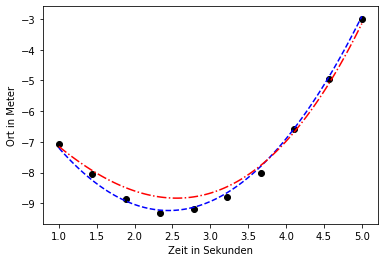

In [19]:
### Auftragen der neuen Daten und der Modelle ###
t_test, x_test = np.loadtxt('linear_regression_data04.dat', unpack = True)

plt.scatter(t_test, x_test, color = 'k')

# Auftragen des quadratischen Modells
T = np.linspace(np.min(t_test), np.max(t_test), 100)
plt.plot(T, w_quadr[2]*T**2+w_quadr[1]*T+w_quadr[0], 'b--')

# Auftragen des kubischen Modells
plt.plot(T, w_kub[3]*T**3+w_kub[2]*T**2+w_kub[1]*T+w_kub[0], 'r-.')

# Beschriften der Achsen
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Ort in Meter')

plt.show()

In [20]:
# Anzahl der Datenpunkte 
N = len(t_test)

### Quadratisches Modell ###
# Aufstellen der erweiterten Datenmatrix
X_quadr_test = np.zeros((N, 3))
for n in range(N):
    X_quadr_test[n]=np.array([1, t_test[n], t_test[n]**2])

# Bestimme den Test- und Verallgemeinerungsfehler für das quadratische Modell
Diff_h_x = X_quadr_test@w_quadr-x_test
R_quadr_test = 1/N*Diff_h_x@Diff_h_x
G_quadr = abs(R_quadr_test-R_quadr)


### kubisches Modell ###
# Aufstellen der erweiterten Datenmatrix
X_kub_test = np.zeros((N, 4))
for n in range(N):
    X_kub_test[n]=np.array([1, t_test[n], t_test[n]**2, t[n]**3])

# Bestimme den Validerungs- und Verallgemeinerungsfehler für das quadratische Modell
Diff_h_x = X_kub_test@w_kub-x_test
R_kub_test = 1/N*Diff_h_x@Diff_h_x
G_kub = abs(R_kub_test-R_kub)

print(f'Der Validierungsfehler des quadratischen Modells ist {R_quadr_test:.2f} und der Verallgemeinerungsfehler ist {G_quadr:.2f}')
print(f'Der Validierungsfehler des kubischen Modells ist {R_kub_test:.2f} und der Verallgemeinerungsfehler ist {G_kub:.2f}')


Der Validierungsfehler des quadratischen Modells ist 0.01 und der Verallgemeinerungsfehler ist 0.42
Der Validierungsfehler des kubischen Modells ist 4.61 und der Verallgemeinerungsfehler ist 3.83


Anhand des besonders kleinen Testfehlers des quadratischen Modells und des vergleichsweise großen Fehlers in der Validierung, wie auch der Verallgemeinerung des kubischen Modells, ist das quadratische Modell zu bevorzugen.

Im quadratischen Modell hat der Parameter $w_2$ die Bedeutung einer Beschleunigung $w_1$ die Bedeutung der Startgeschwindigkeit und $w_0$ die Bedeutung des Startorts.